# Import ScikitLearn, Pandas and Numpy

In [1]:
import sklearn
import pandas as pd
import numpy as np

# 1. Read the Dataset using Pandas


In [2]:
train_data = pd.read_csv("data/image_train_data/image_train_data.csv")
test_data = pd.read_csv("data/image_test_data/image_test_data.csv")

In [3]:
train_data

,id,image,label,deep_features,image_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...
...,...,...,...,...,...
2000,49913,Height: 32 Width: 32,automobile,[1.20238 0.342965 0 0 0.433364 0.782301 9.7449...,[188 223 251 207 231 247 215 231 241 193 209 2...
2001,49919,Height: 32 Width: 32,automobile,[0 0 0 0.769036 0 0 9.27708 0 0 0 0 0 1.61649 ...,[33 32 24 33 34 27 36 38 32 45 41 35 71 59 42 ...
2002,49927,Height: 32 Width: 32,dog,[0.558163 0 1.0511 0 0 0 8.92445 0.321142 0 0 ...,[3 2 7 3 2 7 3 2 7 3 2 7 5 4 9 5 4 9 5 4 9 4 5...
2003,49958,Height: 32 Width: 32,cat,[0.67496 0 0 1.96409 0.646847 0.17025 11.3564 ...,[102 142 139 97 136 133 98 137 134 98 137 135 ...


# 2. Exploratory Data Analysis

In [4]:
train_data.head()

,id,image,label,deep_features,image_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2005 non-null   int64 
 1   image          2005 non-null   object
 2   label          2005 non-null   object
 3   deep_features  2005 non-null   object
 4   image_array    2005 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.4+ KB


In [6]:
train_data.describe()

,id
count,2005.000000
mean,24828.161596
std,14686.132072
min,24.000000
25%,12005.000000
50%,23963.000000
75%,37742.000000
max,49970.000000


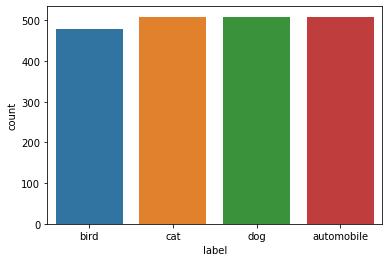

In [7]:
import seaborn as sns

fig = sns.countplot(x='label', data=train_data)

# 3. Data Preprocessing

The "deep_features" column and "image_array" column have there lists string represented. So, they need to be transformed to floats and integers respectively to be used

In [8]:
def filtering_image_array(row):
    y = row.loc['deep_features']
    y = y.replace('[', '').replace(']','').replace(" ", ",").split(',')
    y = list(map(float, y))
    row.loc['deep_features'] = y
    
    x = row.loc['image_array']
    x = x.replace('[', '').replace(']','').replace(" ", ",").split(',')
    x = list(map(int, x))
    row.loc['image_array'] = x
    return row

train_data = train_data.apply(filtering_image_array, axis=1)
test_data = test_data.apply(filtering_image_array, axis=1)

In [9]:
train_data.head()

,id,image,label,deep_features,image_array
0,24,Height: 32 Width: 32,bird,"[0.242872, 1.09545, 0.0, 0.39363, 0.0, 0.0, 11...","[73, 77, 58, 71, 68, 50, 77, 69, 44, 120, 116,..."
1,33,Height: 32 Width: 32,cat,"[0.525088, 0.0, 0.0, 0.0, 0.0, 0.0, 9.94829, 0...","[7, 5, 8, 7, 5, 8, 5, 4, 6, 7, 4, 7, 11, 5, 9,..."
2,36,Height: 32 Width: 32,cat,"[0.566016, 0.0, 0.0, 0.0, 0.0, 0.0, 9.9972, 0....","[169, 122, 65, 131, 108, 75, 193, 196, 192, 21..."
3,70,Height: 32 Width: 32,dog,"[1.1298, 0.0, 0.0, 0.778194, 0.0, 0.758051, 9....","[154, 179, 152, 159, 183, 157, 165, 189, 162, ..."
4,90,Height: 32 Width: 32,bird,"[1.71787, 0.0, 0.0, 0.0, 0.0, 0.0, 9.33936, 0....","[216, 195, 180, 201, 178, 160, 210, 184, 164, ..."


In [10]:
im = train_data.loc[0]['image_array']
im[0:10]

[73, 77, 58, 71, 68, 50, 77, 69, 44, 120]

Plot images by index

In [11]:
import matplotlib.pyplot as plt

def plot_images_index(ids, data):
    for idx in ids:
        row = data.loc[idx]
        im = np.asarray(row.loc['image_array'])
        im.resize(32,32,3)
        plt.figure(figsize=(1, 1))
        plt.imshow(im)
    plt.show()
    
def plot_images_id(ids, data):
    for idx in ids:
        row = data.loc[data['id'] == idx]
        im = np.asarray(row.loc[:, 'image_array'].tolist())
        im = np.resize(im, (32,32,3))
        plt.figure(figsize=(1, 1))
        plt.imshow(im)
    plt.show()

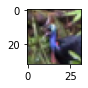

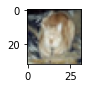

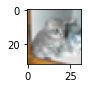

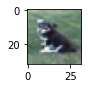

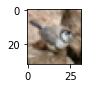

In [12]:
x = [24, 33, 36, 70, 90]
plot_images_id(x, train_data)

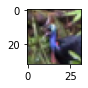

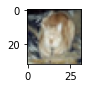

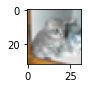

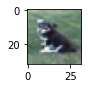

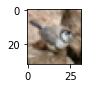

In [13]:
x = [0, 1, 2, 3, 4]
plot_images_index(x, train_data)

Apply LabelEncoder() on the label column of both training and test datasets.

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data['label'])

LabelEncoder()

In [15]:
def encodin_labels(row):
    encoded_label = encoder.transform([row['label']])
    row['encoded_label'] = encoded_label[0]
    return row

train_data = train_data.apply(encodin_labels, axis=1)
train_data.head()

,id,image,label,deep_features,image_array,encoded_label
0,24,Height: 32 Width: 32,bird,"[0.242872, 1.09545, 0.0, 0.39363, 0.0, 0.0, 11...","[73, 77, 58, 71, 68, 50, 77, 69, 44, 120, 116,...",1
1,33,Height: 32 Width: 32,cat,"[0.525088, 0.0, 0.0, 0.0, 0.0, 0.0, 9.94829, 0...","[7, 5, 8, 7, 5, 8, 5, 4, 6, 7, 4, 7, 11, 5, 9,...",2
2,36,Height: 32 Width: 32,cat,"[0.566016, 0.0, 0.0, 0.0, 0.0, 0.0, 9.9972, 0....","[169, 122, 65, 131, 108, 75, 193, 196, 192, 21...",2
3,70,Height: 32 Width: 32,dog,"[1.1298, 0.0, 0.0, 0.778194, 0.0, 0.758051, 9....","[154, 179, 152, 159, 183, 157, 165, 189, 162, ...",3
4,90,Height: 32 Width: 32,bird,"[1.71787, 0.0, 0.0, 0.0, 0.0, 0.0, 9.33936, 0....","[216, 195, 180, 201, 178, 160, 210, 184, 164, ...",1


In [16]:
def encodin_labels(row):
    encoded_label = encoder.transform([row['label']])
    row['encoded_label'] = encoded_label[0]
    return row

test_data = test_data.apply(encodin_labels, axis=1)

# 4. Logistic Regression Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_simple = Pipeline(
    steps=[
        ('StandardScaler', StandardScaler()),
        ('Logistic_Regression', LogisticRegression(multi_class='multinomial', max_iter=1000))
    ],
    verbose=True
)

pipeline_complex = Pipeline(
    steps=[
        ('StandardScaler', StandardScaler()),
        ('Logistic_Regression', LogisticRegression(multi_class='multinomial', max_iter=1000))
    ],
    verbose=True
)

from sklearn import set_config
set_config(display='diagram')

# 5. Pipeline Training

In [18]:
features_simple = 'image_array'
label = 'encoded_label'
X_train_simple = np.array(train_data[features_simple].tolist())
y_train = np.array(train_data[label].tolist())
pipeline_simple.fit(X_train_simple, y_train)

[Pipeline] .... (step 1 of 2) Processing StandardScaler, total=   0.4s
[Pipeline]  (step 2 of 2) Processing Logistic_Regression, total=  15.7s


Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('Logistic_Regression',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))],
         verbose=True)

In [19]:
features_simple = 'image_array'
label = 'encoded_label'
X_train_simple = np.array(train_data[features_simple].tolist())
y_train = np.array(train_data[label].tolist())
pipeline_simple.fit(X_train_simple, y_train)

[Pipeline] .... (step 1 of 2) Processing StandardScaler, total=   0.2s
[Pipeline]  (step 2 of 2) Processing Logistic_Regression, total=  15.6s


Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('Logistic_Regression',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))],
         verbose=True)

In [20]:
features_complex = 'deep_features'
X_train_complex = np.array(train_data[features_complex].tolist())
y_train = np.array(train_data[label].tolist())
pipeline_complex.fit(X_train_complex, y_train)

[Pipeline] .... (step 1 of 2) Processing StandardScaler, total=   0.2s
[Pipeline]  (step 2 of 2) Processing Logistic_Regression, total=   7.9s


Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('Logistic_Regression',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))],
         verbose=True)

## PLot Learning Curves Pipeline

In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    estimator.verbose = False
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    estimator.verbose = True
    return plt

# 6. Metrics

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_test = np.array(test_data[features_simple].tolist())
y_pred_simple = pipeline_simple.predict(X_test)
y_true = np.array(test_data[label].tolist())

print('Classification report:\n\n{}'.format(
    classification_report(test_data[label], y_pred_simple))
)
print('Accuracy Score:', accuracy_score(y_true, y_pred_simple))

Classification report:

              precision    recall  f1-score   support

           0       0.65      0.51      0.57      1000
           1       0.42      0.47      0.44      1000
           2       0.33      0.35      0.34      1000
           3       0.37      0.39      0.38      1000

    accuracy                           0.43      4000
   macro avg       0.44      0.43      0.43      4000
weighted avg       0.44      0.43      0.43      4000

Accuracy Score: 0.429


In [23]:
X_test = np.array(test_data[features_complex].tolist())
y_pred_complex = pipeline_complex.predict(X_test)
y_true = np.array(test_data[label].tolist())

print('Classification report:\n\n{}'.format(
    classification_report(test_data[label], y_pred_complex))
)
print('Accuracy Score:', accuracy_score(y_true, y_pred_complex))

Classification report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1000
           1       0.85      0.79      0.82      1000
           2       0.65      0.66      0.65      1000
           3       0.70      0.74      0.72      1000

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000

Accuracy Score: 0.78675


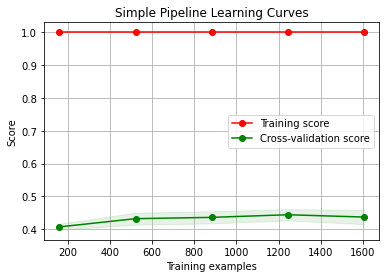

In [24]:
fig = plot_learning_curve(pipeline_simple, 'Simple Pipeline Learning Curves', X_train_simple, y_train)

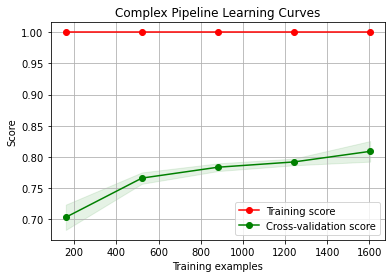

In [25]:
fig = plot_learning_curve(pipeline_complex, 'Complex Pipeline Learning Curves', X_train_complex, y_train)

# Assignment

## Task 2: Create category-specific image retrieval models

In [26]:
bird_data = train_data.query('label == "bird"')
bird_data = bird_data.reset_index(drop=True)
bird_data.head()

,id,image,label,deep_features,image_array,encoded_label
0,24,Height: 32 Width: 32,bird,"[0.242872, 1.09545, 0.0, 0.39363, 0.0, 0.0, 11...","[73, 77, 58, 71, 68, 50, 77, 69, 44, 120, 116,...",1
1,90,Height: 32 Width: 32,bird,"[1.71787, 0.0, 0.0, 0.0, 0.0, 0.0, 9.33936, 0....","[216, 195, 180, 201, 178, 160, 210, 184, 164, ...",1
2,121,Height: 32 Width: 32,bird,"[0.0, 0.237535, 0.0, 0.0, 0.0, 0.0, 9.9908, 0....","[93, 96, 88, 102, 106, 97, 117, 121, 111, 118,...",1
3,138,Height: 32 Width: 32,bird,"[0.658936, 0.0, 0.0, 0.0, 0.0, 0.0, 9.93748, 0...","[205, 193, 195, 200, 187, 193, 202, 190, 193, ...",1
4,335,Height: 32 Width: 32,bird,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.50707, 0.0, 0...","[160, 159, 154, 162, 161, 156, 169, 168, 163, ...",1


In [27]:
cat_data = train_data.query('label == "cat"')
cat_data = cat_data.reset_index(drop=True)
cat_data.head()

,id,image,label,deep_features,image_array,encoded_label
0,33,Height: 32 Width: 32,cat,"[0.525088, 0.0, 0.0, 0.0, 0.0, 0.0, 9.94829, 0...","[7, 5, 8, 7, 5, 8, 5, 4, 6, 7, 4, 7, 11, 5, 9,...",2
1,36,Height: 32 Width: 32,cat,"[0.566016, 0.0, 0.0, 0.0, 0.0, 0.0, 9.9972, 0....","[169, 122, 65, 131, 108, 75, 193, 196, 192, 21...",2
2,159,Height: 32 Width: 32,cat,"[0.0, 0.0, 0.0, 0.643275, 0.0, 0.0, 10.1772, 0...","[154, 145, 135, 152, 144, 135, 157, 146, 136, ...",2
3,331,Height: 32 Width: 32,cat,"[0.0, 0.0, 0.510964, 0.0, 0.0, 0.0, 11.2724, 0...","[45, 65, 92, 72, 95, 110, 106, 132, 129, 106, ...",2
4,367,Height: 32 Width: 32,cat,"[1.38658, 0.0, 0.0, 0.0, 0.0, 0.182891, 10.395...","[168, 151, 143, 145, 130, 124, 134, 134, 136, ...",2


In [28]:
dog_data = train_data.query('label == "dog"')
dog_data = dog_data.reset_index(drop=True)
dog_data.head()

,id,image,label,deep_features,image_array,encoded_label
0,70,Height: 32 Width: 32,dog,"[1.1298, 0.0, 0.0, 0.778194, 0.0, 0.758051, 9....","[154, 179, 152, 159, 183, 157, 165, 189, 162, ...",3
1,107,Height: 32 Width: 32,dog,"[0.0, 0.0, 0.220678, 0.0, 0.0, 0.0, 8.58053, 0...","[97, 51, 31, 104, 58, 38, 107, 61, 40, 107, 62...",3
2,177,Height: 32 Width: 32,dog,"[0.0, 1.45966, 0.0, 0.422992, 0.0, 0.0, 7.8609...","[55, 75, 42, 51, 76, 37, 57, 83, 48, 56, 83, 4...",3
3,424,Height: 32 Width: 32,dog,"[0.9424, 0.0, 0.220353, 0.0, 0.0, 0.0, 10.0445...","[60, 35, 18, 63, 49, 38, 66, 56, 44, 64, 51, 3...",3
4,462,Height: 32 Width: 32,dog,"[1.43463, 0.0, 0.0, 0.0, 0.0, 0.0, 9.27982, 0....","[86, 69, 75, 57, 41, 48, 46, 35, 41, 78, 46, 5...",3


In [29]:
automobile_data = train_data.query('label == "automobile"')
automobile_data = automobile_data.reset_index(drop=True)
automobile_data.head()

,id,image,label,deep_features,image_array,encoded_label
0,97,Height: 32 Width: 32,automobile,"[1.57819, 0.0, 0.0, 0.0, 0.0, 0.0, 9.00632, 0....","[33, 44, 27, 29, 44, 31, 32, 45, 34, 38, 53, 3...",0
1,136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.57379, 0.0, 0...","[35, 59, 53, 36, 56, 56, 42, 62, 64, 40, 59, 6...",0
2,302,Height: 32 Width: 32,automobile,"[0.583938, 0.0, 0.0, 0.0, 0.0, 0.0, 9.07562, 0...","[64, 52, 37, 85, 60, 40, 92, 66, 47, 90, 65, 4...",0
3,312,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.392823, 0.0, 0.727434, 7.414...","[124, 126, 113, 124, 126, 113, 133, 132, 119, ...",0
4,323,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 4.4231, 0.178729, 0.0, 7.25681...","[241, 241, 241, 238, 238, 238, 240, 240, 240, ...",0


In [30]:
from sklearn.neighbors import NearestNeighbors

bird_model = Pipeline(
    steps=[
        ('Nearest Neighbor', NearestNeighbors(metric='euclidean', algorithm='brute'))
    ],
    verbose=True
)

cat_model = Pipeline(
    steps=[
        ('Nearest Neighbor', NearestNeighbors(metric='euclidean', algorithm='brute'))
    ],
    verbose=True
)

dog_model = Pipeline(
    steps=[
        ('Nearest Neighbor', NearestNeighbors(metric='euclidean', algorithm='brute'))
    ],
    verbose=True
)

automobile_model = Pipeline(
    steps=[
        ('Nearest Neighbor', NearestNeighbors(metric='euclidean', algorithm='brute'))
    ],
    verbose=True
)

In [31]:
X_train_bird = np.array(bird_data[features_complex].tolist())
bird_model.fit(X_train_bird)

[Pipeline] .. (step 1 of 1) Processing Nearest Neighbor, total=   0.0s


Pipeline(steps=[('Nearest Neighbor',
                 NearestNeighbors(algorithm='brute', metric='euclidean'))],
         verbose=True)

In [32]:
X_train_cat = np.array(cat_data[features_complex].tolist())
cat_model.fit(X_train_cat)

[Pipeline] .. (step 1 of 1) Processing Nearest Neighbor, total=   0.0s


Pipeline(steps=[('Nearest Neighbor',
                 NearestNeighbors(algorithm='brute', metric='euclidean'))],
         verbose=True)

In [33]:
X_train_dog = np.array(dog_data[features_complex].tolist())
dog_model.fit(X_train_dog)

[Pipeline] .. (step 1 of 1) Processing Nearest Neighbor, total=   0.0s


Pipeline(steps=[('Nearest Neighbor',
                 NearestNeighbors(algorithm='brute', metric='euclidean'))],
         verbose=True)

In [34]:
X_train_automobile = np.array(automobile_data[features_complex].tolist())
automobile_model.fit(X_train_automobile)

[Pipeline] .. (step 1 of 1) Processing Nearest Neighbor, total=   0.0s


Pipeline(steps=[('Nearest Neighbor',
                 NearestNeighbors(algorithm='brute', metric='euclidean'))],
         verbose=True)

## 3. A simple example of nearest-neighbors classification:

In [35]:
def nearest_image(sample, type_data, pipeline):
    distances, indices = pipeline['Nearest Neighbor'].kneighbors(np.array(sample[features_complex]).reshape(1, -1))
    neighbors = pd.DataFrame({'distance':distances[0].tolist(), 'index':indices[0].tolist()})
    left_join = pd.merge(neighbors, type_data, how='left', left_on='index', right_index=True)
    plot_images_id([left_join.loc[0, 'id']], type_data)
    return left_join

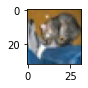

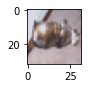

36.15572932231886

In [36]:
sample = test_data.loc[0]
sample_list = [sample.id]
plot_images_id(sample_list, test_data)
table = nearest_image(sample, cat_data, cat_model)
table['distance'].mean()

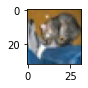

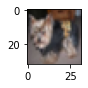

37.770711933529554

In [37]:
sample = test_data.loc[0]
sample_list = [sample.id]
plot_images_id(sample_list, test_data)
table = nearest_image(sample, dog_data, dog_model)
table['distance'].mean()